In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
from scipy import stats
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [28]:
kc = pd.read_csv('csv/kc_norm.csv')
data_norm = pd.read_csv('csv/data_norm.csv')

kc = kc.drop(columns = 'Unnamed: 0')
data_norm = data_norm.drop(columns = 'Unnamed: 0')

In [3]:
kc.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'total_sqft', 'yr_sold', 'age', 'basement', 'distance_from_city',
       'distance_from_airport'],
      dtype='object')


## Model 1

In [4]:
kcnew = pd.concat([  kc.waterfront, kc.grade,kc.view, data_norm],axis = 1)
fit = ols('kc.price ~ C(grade)  + sqft_living + sqft_lot + waterfront +  age + distance_from_city + distance_from_airport', data=kcnew).fit() 
y = kc.price
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               kc.price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2458.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:20:30   Log-Likelihood:            -1.6409e+05
No. Observations:               12615   AIC:                         3.282e+05
Df Residuals:                   12601   BIC:                         3.283e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.074e+05   6.24e+04      6.525      0.000    2.85e+05     5.3e+05
C(grade)[T.5.0]       -4.492e+04   6.32e+04     -0.711      0.477   -1.69e+05     7.9e+04
C(grade)[T.6.0]       -4.472e+04   6.24e+04     -0.716      0.474   -1.67e+05    7.76e+04
C(grade)[T.7.0]         1.24e+04   6.24e+04      0.199      0.843    -1.1e+05    1.35e+05
C(grade)[T.8.0]        9.439e+04   6.25e+04      1.510      0.131   -2.81e+04    2.17e+05
C(grade)[T.9.0]        2.036e+05   6.26e+04      3.250      0.001    8.08e+04    3.26e+05
C(grade)[T.10.0]       2.643e+05   6.29e+04      4.200      0.000    1.41e+05    3.88e+05
C(grade)[T.11.0]       3.598e+05    6.5e+04      5.532      0.000    2.32e+05    4.87e+05
sqft_living            8.489e+04   1359.551     62.439      0.000    8.22e+04    8.76e+04
sqft_lot               -672.2227   1088.535     -0.618      0.537   -2805.916    1461.471
waterfront             3.414e+05   2.71e+04     12.615      0.000    2.88e+05    3.94e+05
age                    3.323e+04   1296.562     25.630      0.000    3.07e+04    3.58e+04
distance_from_city    -8.502e+04   1190.194    -71.435      0.000   -8.74e+04   -8.27e+04
distance_from_airport  5.061e+04    979.688     51.660      0.000    4.87e+04    5.25e+04
==============================================================================
Omnibus:                     1061.896   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2209.017
Skew:                           0.555   Prob(JB):                         0.00
Kurtosis:                       4.723   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               kc.price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2458.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:35:48   Log-Likelihood:            -1.6409e+05
No. Observations:               12615   AIC:                         3.282e+05
Df Residuals:                   12601   BIC:                         3.283e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.074e+

In [5]:
summary = fit.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

14 9
['Intercept', 'C(grade)[T.9.0]', 'C(grade)[T.10.0]', 'C(grade)[T.11.0]', 'sqft_living']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.074e+05,6.24e+04,6.525,0.000,2.85e+05,5.3e+05
C(grade)[T.5.0],-4.492e+04,6.32e+04,-0.711,0.477,-1.69e+05,7.9e+04
C(grade)[T.6.0],-4.472e+04,6.24e+04,-0.716,0.474,-1.67e+05,7.76e+04
C(grade)[T.7.0],1.24e+04,6.24e+04,0.199,0.843,-1.1e+05,1.35e+05
C(grade)[T.8.0],9.439e+04,6.25e+04,1.510,0.131,-2.81e+04,2.17e+05


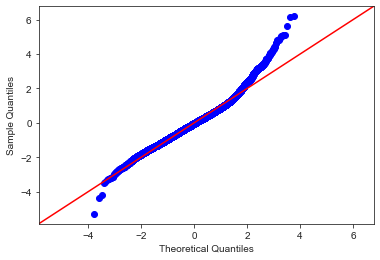

In [6]:
fig = sm.graphics.qqplot(fit.resid, dist=scs.norm, line='45', fit=True)

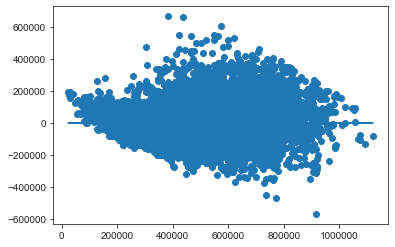

In [7]:
plt.scatter(fit.predict(kcnew), fit.resid)
plt.plot(fit.predict(kcnew), [0 for i in range(len(kcnew))])


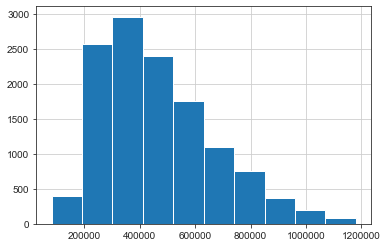

In [8]:
kc.price.hist()

In [9]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, kc.price.quantile(q=q)))

0.8 percentile: 630000.0
0.81 percentile: 641000.0
0.82 percentile: 651000.0
0.83 percentile: 665000.0
0.84 percentile: 676000.0
0.85 percentile: 690000.0
0.86 percentile: 700000.0
0.87 percentile: 715590.0000000001
0.88 percentile: 730000.0
0.89 percentile: 746460.0000000009
0.9 percentile: 759974.0
0.91 percentile: 775000.0
0.92 percentile: 795000.0
0.93 percentile: 810000.0
0.94 percentile: 834579.9199999999
0.95 percentile: 858134.9999999997
0.96 percentile: 890943.9999999998
0.97 percentile: 926790.0
0.98 percentile: 975000.0
0.99 percentile: 1048600.0000000058


In [10]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()   

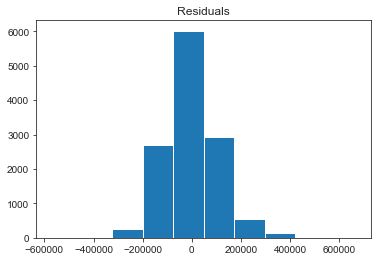

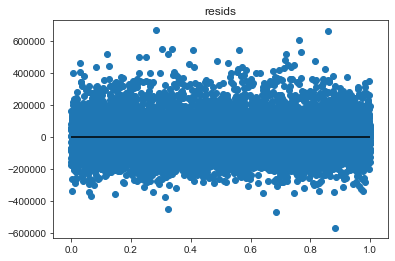

In [11]:
residuals = fit.resid
plot_residuals(residuals)

In [12]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = kcnew
vif = [variance_inflation_factor((X.astype(float)).values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

8 8


In [13]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores



(0.7151026275040537, 0.7139523435975692, 0.7139920875403383)

In [14]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-82276.9050003571, -82275.47121399106, -82207.0119043672)

In [15]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7164090590910596

train R2 score = 0.7146234100681157
test R2 score = 0.7257636114767863
cv5 R2 score = 0.7151026275040537
cv10 R2 score = 0.7139523435975692
cv5 MSE score = -11680076998.979948
cv10  MSE score = -11684423340.033224


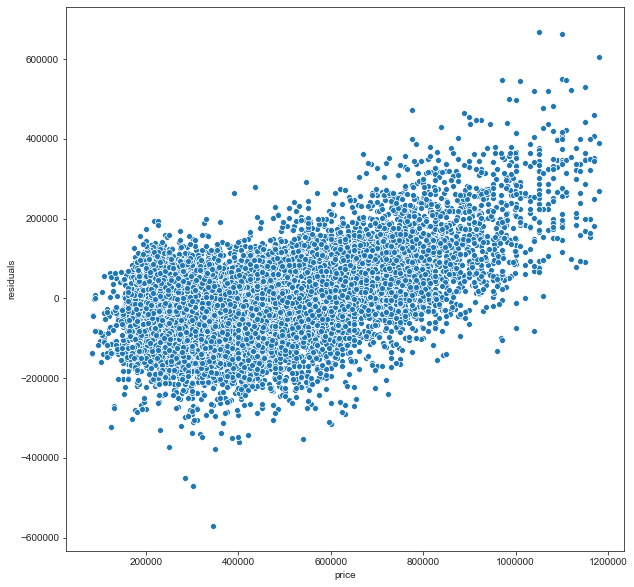

In [16]:
def make_ols_sklearn2(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.model2(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols


make_ols_sklearn2(X, y)


residuals = fit.resid
resid = pd.DataFrame(kc['price'])
resid['residuals']  = residuals

plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)
